**M12  - PARTE1**

# Regressão 01 - tarefa 01

### 1. Explorando a base de gorjetas

a. Na aula fizemos uma regressão de ```tip``` explicada por ```net_bill```. Carregue os pacotes e a base, crie as variáveis necessárias como na aula, e reproduza esta regressão.

b. Reproduza também o gráfico de dispersão dessas duas variáveis.

In [2]:
#IMPORTANDO AS BIBLIOTECAS
import pandas as pd
import seaborn as sns
from seaborn import load_dataset

import matplotlib.pyplot as plt

import numpy as np

import statsmodels.formula.api as smf

In [3]:
tips = sns.load_dataset("tips")
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips['net_bill'] = tips['total_bill'] - tips['tip']
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98


In [50]:
# a.

# Carregando a base de gorjetas
tips = sns.load_dataset("tips")

#Criando a variável tip_pct - % da Gorjeta em Relação ao Valor Líquido da Conta
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])

# Criando a variável net_bill - Valor Líquido da Conta
tips['net_bill'] = tips['total_bill'] - tips['tip']

#tips.head()

# Reproduzindo a Regressão de tip Explicada por net_bill
regression_model = smf.ols(formula='tip ~ net_bill', data=tips).fit()
print(regression_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     120.6
Date:                Thu, 30 Oct 2025   Prob (F-statistic):           5.02e-23
Time:                        06:46:13   Log-Likelihood:                -375.63
No. Observations:                 244   AIC:                             755.3
Df Residuals:                     242   BIC:                             762.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3307      0.168      7.907      0.0

(0.0, 10.5)

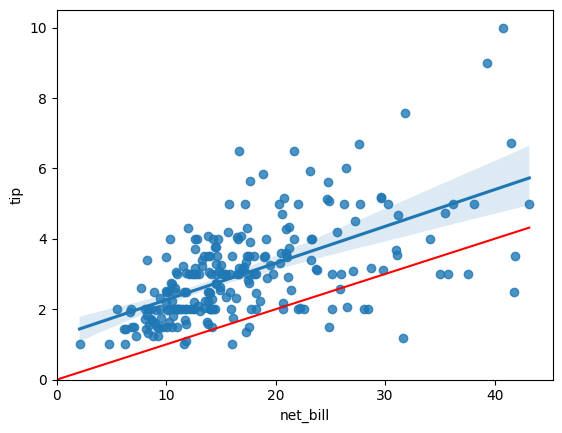

In [4]:
# Gráfico de dispersão
sns.regplot(y = 'tip', x = 'net_bill', data = tips[tips['tip_pct']<.5])

# Gerando dados para a linha dos 10%
x = np.linspace(0,tips['net_bill'].max(),100)
y = .1*x

# Plotando a linha dos 10%
plt.plot(x, y, '-r', label='linha dos 10%')

# Opções estéticas para explicitar o (0,0) no gráfico
plt.xlim(left = 0)
plt.ylim(bottom = 0)

### 2. Mudança de perspectiva

Agora ajuste um modelo de regressão de ```tip_pct``` por ```net_bill```. Construa o gráfico de dispersão correspondente.

In [7]:
# Ajustando o modelo de regressão para tip_pct por net_bill
reg_tip_pct = smf.ols('tip_pct ~ net_bill', data = tips).fit()
print(reg_tip_pct.summary())

                            OLS Regression Results                            
Dep. Variable:                tip_pct   R-squared:                       0.091
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     24.31
Date:                Thu, 30 Oct 2025   Prob (F-statistic):           1.52e-06
Time:                        05:57:40   Log-Likelihood:                 108.00
No. Observations:                 244   AIC:                            -212.0
Df Residuals:                     242   BIC:                            -205.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3053      0.023     13.166      0.0

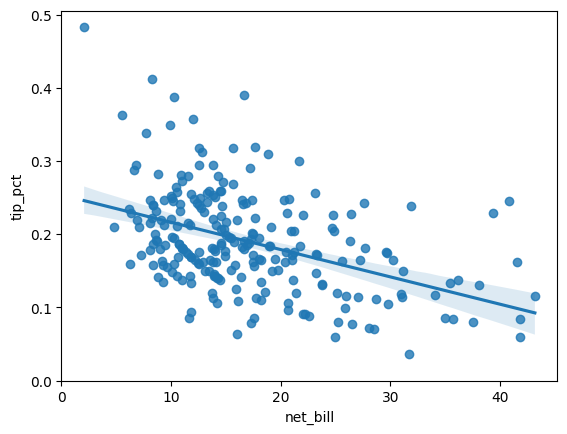

In [8]:
# Gráfico de dispersão para tip_pct por net_bill
sns.regplot(y = 'tip_pct', x = 'net_bill', data = tips[tips['tip_pct']<.5])

# Opções estéticas para explicitar o (0,0) no gráfico
plt.xlim(left = 0)
plt.ylim(bottom = 0)

plt.show()

In [5]:
reg = smf.ols('tip ~ net_bill', data = tips).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     120.6
Date:                Thu, 30 Oct 2025   Prob (F-statistic):           5.02e-23
Time:                        05:55:51   Log-Likelihood:                -375.63
No. Observations:                 244   AIC:                             755.3
Df Residuals:                     242   BIC:                             762.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3307      0.168      7.907      0.000       0.999       1.662
net_bill       0.0993      0.009     10.980      0.000       0.082       0.117
==============================================================================
Omnibus:                       33.873   Durbin-Watson:                   2.123
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               59.942
Skew:                           0.754   Prob(JB):                     9.63e-14
Kurtosis:                       4.903   Cond. No.                         43.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [6]:
dados_novos = tips[0:5]
dados_novos

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98


In [16]:
# 3. calcule o R^2 do modelo para tip
from sklearn.metrics import r2_score

r2_tip = r2_score(dados_novos['tip'], dados_novos['pred_tip'])
print(f'R-squared do modelo para tip: {r2_tip}')

R-squared do modelo para tip: 0.007265800846099846


In [14]:
# 2. obtenha o valor predito para `tip` como `tip_pct * net_bill`
dados_novos.loc[:, 'pred_tip'] = dados_novos['pred_tip_pct'] * dados_novos['net_bill']
display(dados_novos[['net_bill', 'tip', 'pred_tip_pct', 'pred_tip']])

,net_bill,tip,pred_tip_pct,pred_tip
0,15.98,1.01,0.207087,3.309254
1,8.68,1.66,0.251951,2.186938
2,17.51,3.50,0.197684,3.461450
3,20.37,3.31,0.180107,3.668785
4,20.98,3.61,0.176358,3.699998


In [15]:
# 1. Obtenha o valor predito 'pred' para 'tip_pct'
dados_novos.loc[:, 'pred_tip_pct'] = reg_tip_pct.predict(dados_novos['net_bill'])
display(dados_novos[['net_bill', 'tip_pct', 'pred_tip_pct']])

,net_bill,tip_pct,pred_tip_pct
0,15.98,0.063204,0.207087
1,8.68,0.191244,0.251951
2,17.51,0.199886,0.197684
3,20.37,0.162494,0.180107
4,20.98,0.172069,0.176358


### 3. Comente

Compare os dois gráficos e comente (de forma objetiva e suscinta) a relação entre eles e a diferença do ajuste. Podemos comparar diretamente os $R^2$s?

In [43]:
# Ajustando o modelo de regressão de tip_pct por net_bill
regression_model = smf.ols(formula='tip_pct ~ net_bill', data=tips).fit()

# Verificando a significância estatística
p_value_net_bill = regression_model.pvalues['net_bill']

if p_value_net_bill < 0.05:
    print("O coeficiente de net_bill é estatisticamente significativo.")
else:
    print("O coeficiente de net_bill não é estatisticamente significativo.")

O coeficiente de net_bill é estatisticamente significativo.


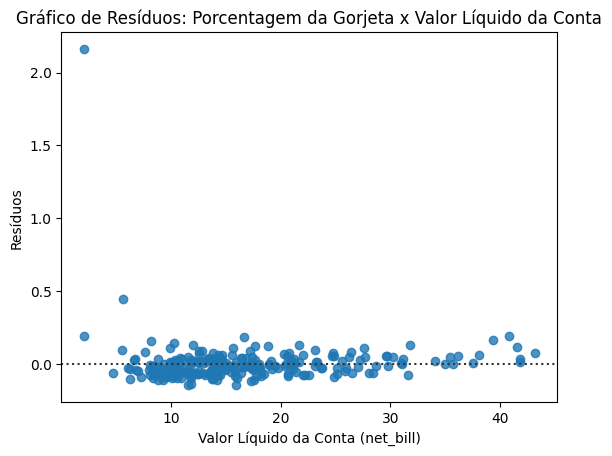

NameError: name 'stats' is not defined

In [45]:
# Ajustando o modelo de regressão de tip_pct por net_bill
regression_model = smf.ols(formula='tip_pct ~ net_bill', data=tips).fit()

# Gráfico de resíduos
sns.residplot(x='net_bill', y='tip_pct', data=tips)
plt.xlabel('Valor Líquido da Conta (net_bill)')
plt.ylabel('Resíduos')
plt.title('Gráfico de Resíduos: Porcentagem da Gorjeta x Valor Líquido da Conta')
plt.show()

# Verificando normalidade dos resíduos
residuals = regression_model.resid
normality_test = stats.normaltest(residuals)
if normality_test.pvalue < 0.05:
    print("Os resíduos não seguem uma distribuição normal.")
else:
    print("Os resíduos seguem uma distribuição normal.")

# Verificando multicolinearidade (caso haja outras variáveis independentes)
# Você pode utilizar a matriz de correlação entre as variáveis independentes para verificar a multicolinearidade.

correlation_matrix = tips.corr()
print("Matriz de Correlação entre as Variáveis Independentes:")
print(correlation_matrix)

**Comparação dos dois modelos e gráficos:**

*   **Relação:** Ambos os gráficos mostram uma relação positiva entre as variáveis, o que significa que à medida que a conta líquida aumenta, a gorjeta (ou porcentagem da gorjeta) geralmente aumenta. No entanto, a relação no gráfico gorjeta vs conta_liquida parece mais linear do que no gráfico `porcentagem_gorjeta vs conta_liquida, onde a relação parece achatar à medida que a conta_liquida aumenta.
   **Diferença no Ajuste:** A linha de regressão no gráfico gorjeta vs conta_liquida parece se ajustar mais de perto aos pontos de dados do que a linha de regressão no gráfico porcentagem_gorjeta vs conta_liquida. Isso se reflete nos valores de R-quadrado.
*   Comparação dos valores de R-quadrado: Não podemos comparar diretamente os valores de R-quadrado dos dois modelos porque as variáveis dependentes são diferentes gorjeta e porcentagem_gorjeta. O R-quadrado mede a proporção da variância na *variável dependente* que é previsível a partir das variáveis independentes. Como as escalas e distribuições de gorjeta e porcentagem_gorjeta são diferentes, suas variâncias totais também são diferentes, tornando uma comparação direta dos valores de R-quadrado enganosa.

Comparação dos valores de R-quadrado:

O valor de R-quadrado para o modelo que prevê a gorjeta usando as porcentagens de gorjeta previstas r2_tip = {r2_tip:.4f} é bastante baixo em comparação com o valor de R-quadrado da regressão inicial da gorjeta em conta_liquida (que foi de aproximadamente 0.333, como visto na saída da célula `HJaO7l-Hqjih. Isso indica que prever o valor da gorjeta prevendo primeiro a porcentagem da gorjeta e depois multiplicando pela conta líquida resulta em um modelo que explica muito menos da variância no valor da gorjeta em comparação com a regressão direta do valor da gorjeta na conta líquida.

### 4. Ajuste do modelo em outra escala

Com o modelo no item 3, obtenha a preditiva do valor da gorjeta:
  1. obtenha o valor predito ```pred``` para ```tip_pct``` (dica, veja o atributo ```reg.fittedvalues```)
  2. obtenha o valor predito para ```tip``` como ```tip_pct * net_bill```
  3. calcule o $R^2$ do modelo para ```tip```
  4. compare esse $R^2$ com o do item 1

In [17]:
# Predição de dados novos
reg.predict(dados_novos)

,0
0,2.918050
1,2.192915
2,3.070031
3,3.354125
4,3.414719


In [30]:
# 1. Obtendo valor predito para tip_pct
tip_pct_pred = reg_tip_pct.fittedvalues

In [46]:
# 2. Obtendo valor predito para tip
tip_pred = tip_pct_pred * tips['net_bill']

In [47]:
# 3. Calculando R² para o Modelo em Relação à Variável tip
r_squared_tip = regression_model.rsquared

In [48]:
# 4. Comparando novo R² com o do item 1.
regression_model = smf.ols(formula='tip_pct ~net_bill', data=tips).fit()
r_squared_tip_pct = regression_model.rsquared

print(f"R² do modelo do item 1 (tip ~ net_bill): 0.333")
print(f"R² do modelo do item 4 (tip_pct ~ net_bill): {r_squared_tip_pct:.4f}")

R² do modelo do item 1 (tip ~ net_bill): 0.333
R² do modelo do item 4 (tip_pct ~ net_bill): 0.0913


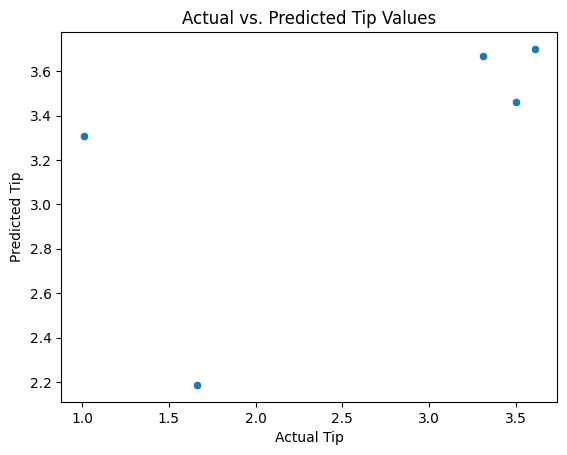

In [21]:
sns.scatterplot(x='tip', y='pred_tip', data=dados_novos)
plt.xlabel('Actual Tip')
plt.ylabel('Predicted Tip')
plt.title('Actual vs. Predicted Tip Values')
plt.show()

Visualizar relações entre variáveis ​​numéricas
Diagramas de dispersão para examinar as relações entre total_bill, gorjeta, net_bill e tip_pct.

**O tamanho do grupo afeta o valor e a porcentagem da gorjeta.**

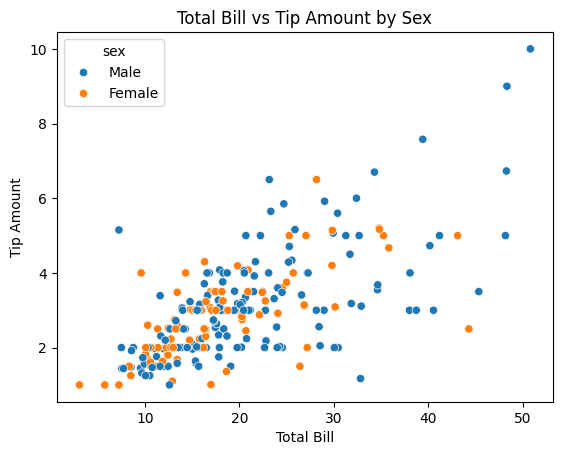

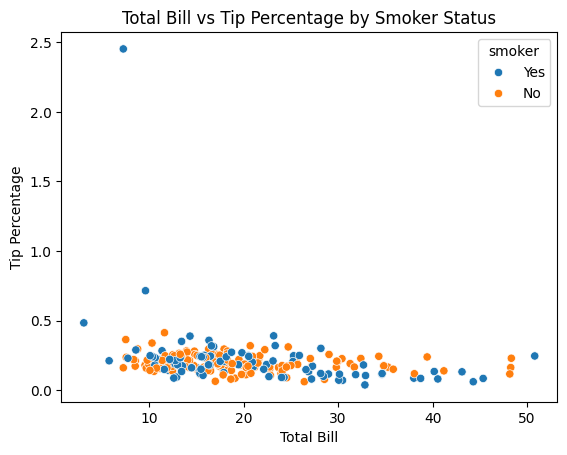

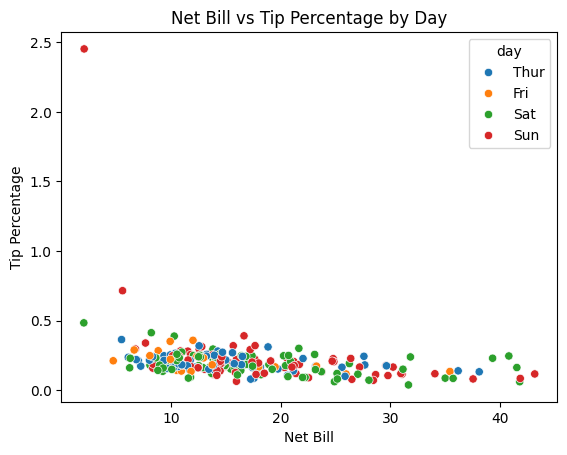

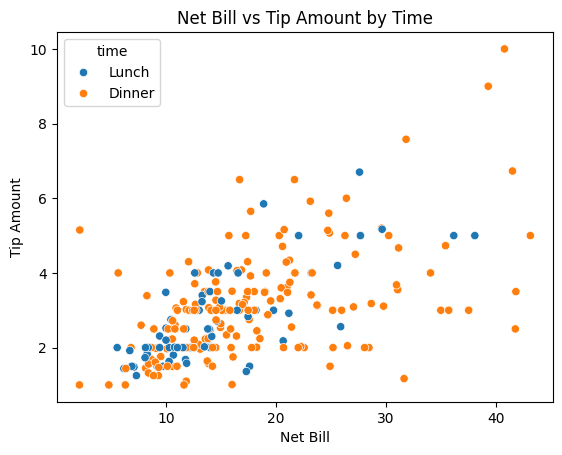

In [32]:
# 1. Create a scatter plot with 'total_bill' on the x-axis and 'tip' on the y-axis, adding 'sex' as hue.
sns.scatterplot(x='total_bill', y='tip', hue='sex', data=tips)
plt.title('Total Bill vs Tip Amount by Sex')
plt.xlabel('Total Bill')
plt.ylabel('Tip Amount')
plt.show()

# 2. Create a scatter plot with 'total_bill' on the x-axis and 'tip_pct' on the y-axis, adding 'smoker' as hue.
sns.scatterplot(x='total_bill', y='tip_pct', hue='smoker', data=tips)
plt.title('Total Bill vs Tip Percentage by Smoker Status')
plt.xlabel('Total Bill')
plt.ylabel('Tip Percentage')
plt.show()

# 3. Create a scatter plot with 'net_bill' on the x-axis and 'tip_pct' on the y-axis, adding 'day' as hue.
sns.scatterplot(x='net_bill', y='tip_pct', hue='day', data=tips)
plt.title('Net Bill vs Tip Percentage by Day')
plt.xlabel('Net Bill')
plt.ylabel('Tip Percentage')
plt.show()

# 4. Create a scatter plot with 'net_bill' on the x-axis and 'tip' on the y-axis, adding 'time' as hue.
sns.scatterplot(x='net_bill', y='tip', hue='time', data=tips)
plt.title('Net Bill vs Tip Amount by Time')
plt.xlabel('Net Bill')
plt.ylabel('Tip Amount')
plt.show()

In [34]:
# Fit a new OLS regression model with 'tip' as the dependent variable and 'net_bill' and 'size' as independent variables
reg_tip_multivariable = smf.ols('tip ~ net_bill + size', data = tips).fit()

# Print the summary of the fitted model
print(reg_tip_multivariable.summary())

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.369
Model:                            OLS   Adj. R-squared:                  0.364
Method:                 Least Squares   F-statistic:                     70.44
Date:                Thu, 30 Oct 2025   Prob (F-statistic):           8.15e-25
Time:                        06:24:19   Log-Likelihood:                -368.79
No. Observations:                 244   AIC:                             743.6
Df Residuals:                     241   BIC:                             754.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8479      0.209      4.057      0.0

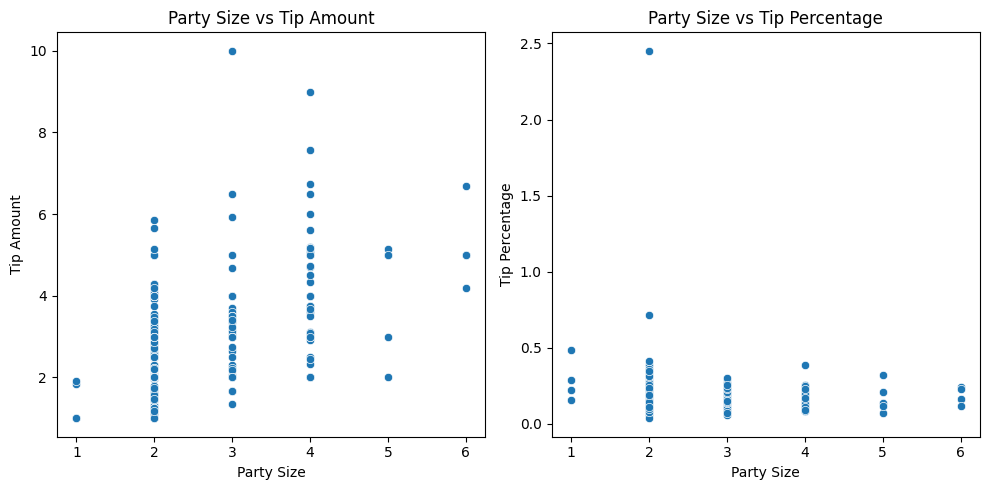

In [33]:
# 1. Create a scatter plot with 'size' on the x-axis and 'tip' on the y-axis
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.scatterplot(x='size', y='tip', data=tips)
plt.xlabel('Party Size')
plt.ylabel('Tip Amount')
plt.title('Party Size vs Tip Amount')

# 2. Create a scatter plot with 'size' on the x-axis and 'tip_pct' on the y-axis
plt.subplot(1, 2, 2)
sns.scatterplot(x='size', y='tip_pct', data=tips)
plt.xlabel('Party Size')
plt.ylabel('Tip Percentage')
plt.title('Party Size vs Tip Percentage')

# 4. Display both plots
plt.tight_layout()
plt.show()

In [26]:
# Fit a new OLS regression model with 'tip_pct' as the dependent variable and 'net_bill', 'size', and 'day' as independent variables
reg_tip_pct_multivariable = smf.ols('tip_pct ~ net_bill + size + day', data = tips).fit()

# Print the summary of the fitted model
print(reg_tip_pct_multivariable.summary())

                            OLS Regression Results                            
Dep. Variable:                tip_pct   R-squared:                       0.114
Model:                            OLS   Adj. R-squared:                  0.096
Method:                 Least Squares   F-statistic:                     6.143
Date:                Thu, 30 Oct 2025   Prob (F-statistic):           2.25e-05
Time:                        06:17:22   Log-Likelihood:                 111.13
No. Observations:                 244   AIC:                            -210.3
Df Residuals:                     238   BIC:                            -189.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2695      0.033      8.108      0.0

In [27]:
# Fit a new OLS regression model with 'tip_pct' as the dependent variable and 'net_bill', 'size', and 'time' as independent variables
reg_tip_pct_multivariable_time = smf.ols('tip_pct ~ net_bill + size + time', data = tips).fit()

# Print the summary of the fitted model
print(reg_tip_pct_multivariable_time.summary())

                            OLS Regression Results                            
Dep. Variable:                tip_pct   R-squared:                       0.104
Model:                            OLS   Adj. R-squared:                  0.092
Method:                 Least Squares   F-statistic:                     9.255
Date:                Thu, 30 Oct 2025   Prob (F-statistic):           8.15e-06
Time:                        06:17:30   Log-Likelihood:                 109.68
No. Observations:                 244   AIC:                            -211.4
Df Residuals:                     240   BIC:                            -197.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.2650      0.032      8.

**Análise dos Dados de Gorjetas**

A análise revelou que o valor líquido da conta é o principal fator associado ao valor das gorjetas. Contas maiores tendem a gerar gorjetas mais altas em termos absolutos.

Embora exista uma relação positiva entre o valor da gorjeta e o valor da conta, a porcentagem da gorjeta não cresce na mesma proporção — ela tende a diminuir levemente em contas mais elevadas.

O tamanho do grupo também influencia o valor das gorjetas: grupos maiores costumam deixar gorjetas maiores, mas a variação percentual não é tão clara.

Variáveis como dia da semana e horário da refeição apresentam alguma diferença no comportamento das gorjetas, porém sem significância estatística forte nos modelos testados.

Entre os modelos avaliados, aquele que prevê diretamente o valor da gorjeta a partir do valor líquido da conta apresentou melhor desempenho (R² ≈ 0,33), e a inclusão do tamanho do grupo elevou ligeiramente esse valor (R² ≈ 0,37).

**Conclusão:** o valor da conta é o preditor mais relevante para o valor da gorjeta, seguido pelo tamanho do grupo. Já o percentual da gorjeta apresenta maior variabilidade e é menos previsível com as variáveis disponíveis.